<h1 align="center"> Explaining Box Plots </h1>

I was always curious about where the -2.698σ,  -.6745σ, 6745σ, and 2.698σ numbers came from. Consequently I would look it up and find they are from Z Score Tables which are basically tables showing the percentages of numbers coming up in a normal. This post will derive a Z Score table and explain the different parts of a box plot.

This notebook explains how those numbers were derived in the hope that they can be more interpretable for your future endeavors.

In [1]:
# Import all libraries for the rest of the blog post
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import ConnectionPatch
from scipy.integrate import quad
import pandas as pd
%matplotlib inline

## Showing Whiskers with Distribution

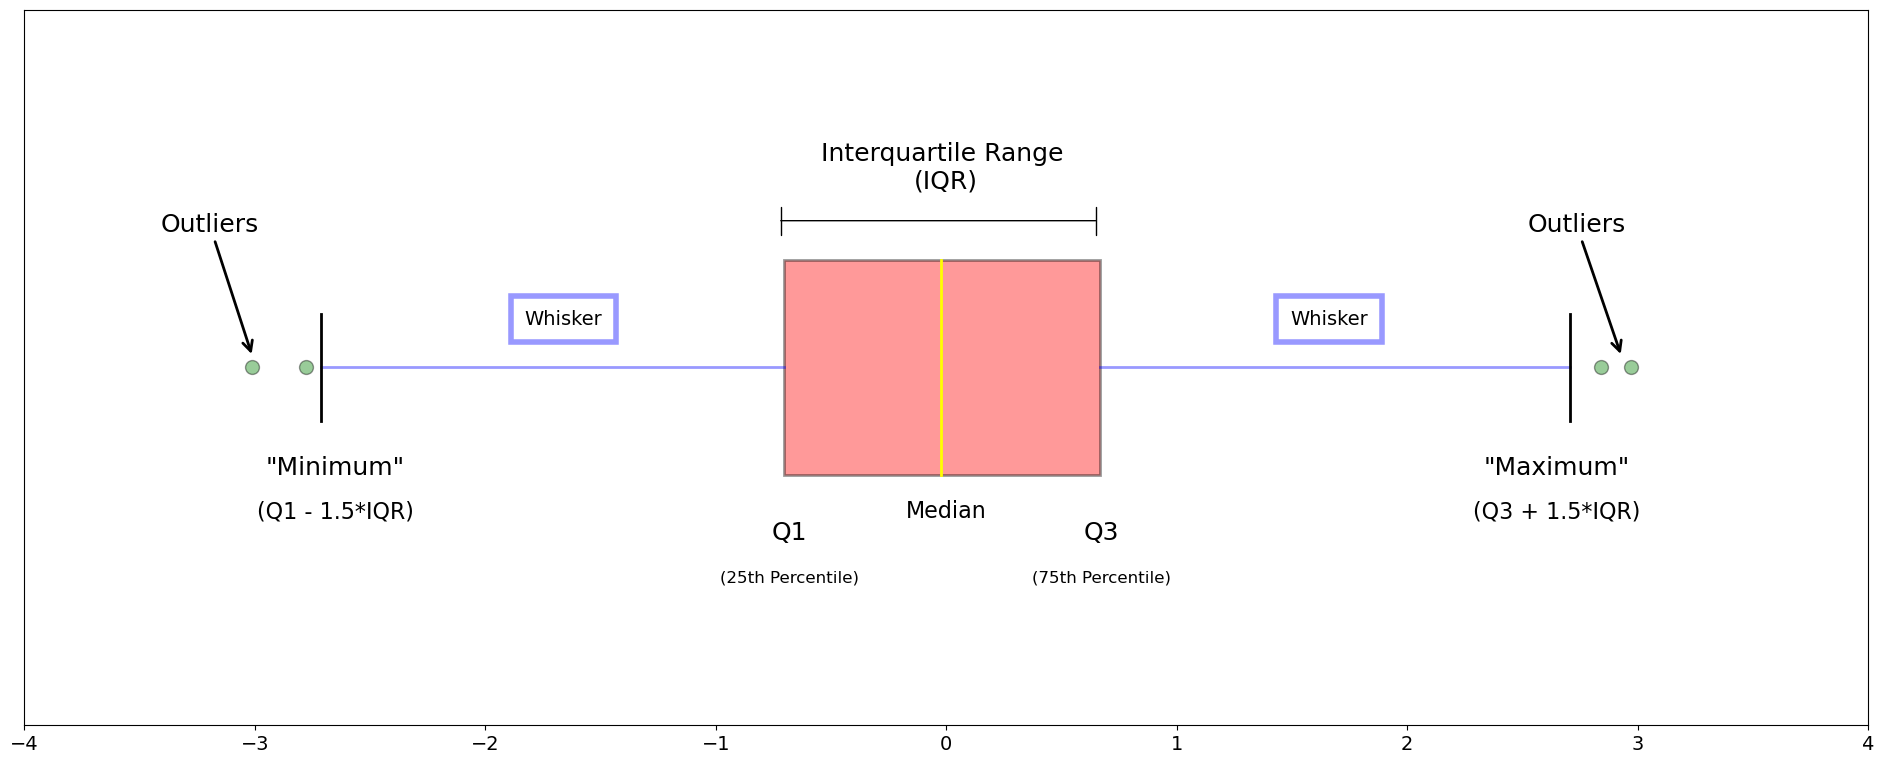

In [2]:
np.random.seed(916170)

# connection path is here: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 5))

# rectangular box plot
bplot = axes.boxplot(s,
                vert=False,
                patch_artist=True, 
                showfliers=True, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                flierprops = dict(marker='o', markerfacecolor='green', markersize=10,
                  linestyle='none', alpha = .4),
                widths = .3,
                zorder = 1)  

axes.set_xlim(-4, 4)
plt.xticks(fontsize = 14)

axes.set_yticks([])
axes.annotate(r'',
            xy=(-.73, .205), xycoords='data',
            xytext=(.66, .205), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

axes.text(0, .25, "Interquartile Range \n(IQR)",  horizontalalignment='center', fontsize=18)
axes.text(0, -.21, r"Median", horizontalalignment='center', fontsize=16);
axes.text(2.65, -.15, "\"Maximum\"", horizontalalignment='center', fontsize=18);
#axes.text(-1.66, .03, "Whisker", horizontalalignment='center', fontsize=18);

axes.text(1.66, .06, r'Whisker', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white',
                  'edgecolor':'blue',
                  'linewidth': 4,
                  'alpha': .4,
                  'pad':10.0});

axes.text(-1.66, .06, r'Whisker', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white',
                  'edgecolor':'blue',
                  'linewidth': 4,
                  'alpha': .4,
                  'pad':10.0});

axes.text(-2.65, -.15, "\"Minimum\"", horizontalalignment='center', fontsize=18);
axes.text(-.68, -.24, r"Q1", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.21, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=16);
axes.text(.6745, -.24, r"Q3", horizontalalignment='center', fontsize=18);
axes.text(.6745, -.30, r"(75th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(-.68, -.30, r"(25th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(2.65, -.21, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16);

axes.annotate('Outliers', xy=(2.93,0.015), xytext=(2.52,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

axes.annotate('Outliers', xy=(-3.01,0.015), xytext=(-3.41,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

fig.tight_layout(pad=2, h_pad=1.5, w_pad=2, rect=[0.1, 0.1, 1.7, 1.7])

In [3]:
# Make PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

# Integrate from -inf to +inf
result, _ = quad(normalProbabilityDensity,
                     -np.inf,
                     np.inf,
                     limit = 1000)

print(result)

0.9999999999999997


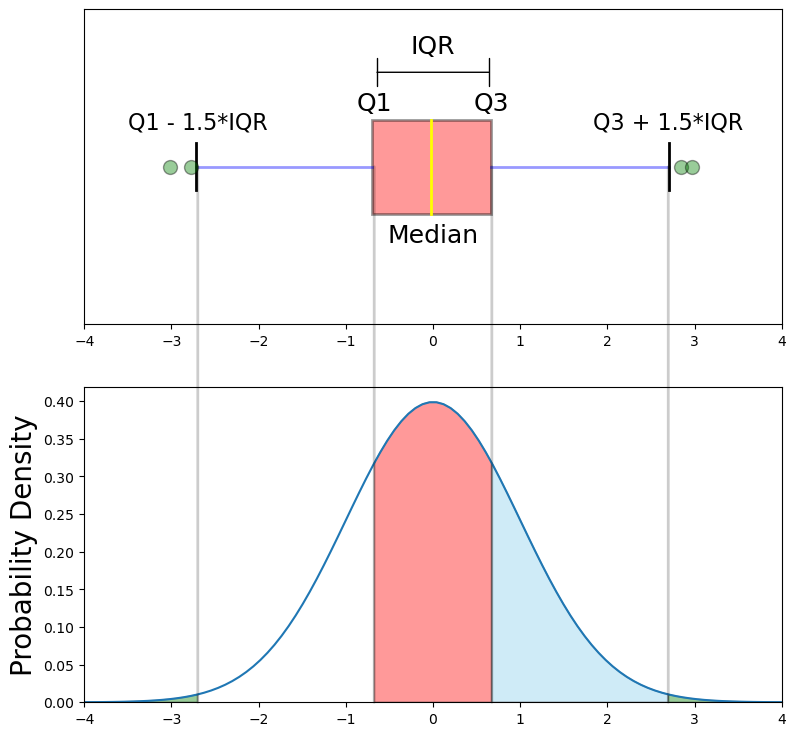

In [4]:
np.random.seed(916170)

# connection path is here: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(9, 9))

# rectangular box plot
bplot = axes[0].boxplot(s,
                vert=False,
                patch_artist=True, 
                showfliers=True, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                flierprops = dict(marker='o', markerfacecolor='green', markersize=10,
                  linestyle='none', alpha = .4),
                widths = .3,
                zorder = 1)   

axes[0].set_xlim(-4, 4)
axes[0].set_yticks([])
x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)

axes[0].annotate(r'',
            xy=(-.6745, .30), xycoords='data',
            xytext=(.6745, .30), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

axes[0].text(0, .36, r"IQR",  horizontalalignment='center', fontsize=18)
axes[0].text(0, -.24, r"Median", horizontalalignment='center', fontsize=18);
axes[0].text(-.6745, .18, r"Q1", horizontalalignment='center', fontsize=18);
axes[0].text(-2.698, .12, r"Q1 - 1.5*IQR", horizontalalignment='center', fontsize=16);
axes[0].text(.6745, .18, r"Q3", horizontalalignment='center', fontsize=18);
axes[0].text(2.698, .12, r"Q3 + 1.5*IQR", horizontalalignment='center', fontsize=16);

axes[1].plot(x, pdf_normal_distribution, zorder= 2)
axes[1].set_xlim(-4, 4)
axes[1].set_ylim(0)
axes[1].set_ylabel('Probability Density', size = 20)

##############################
# lower box
con = ConnectionPatch(xyA=(-.6745, 0), xyB=(-.6745, 0),
    coordsA="data", coordsB="data", axesA=axes[1], axesB=axes[0],
    arrowstyle="-", linewidth=2, color="black", zorder = 2, alpha = .2)
axes[1].add_artist(con)

# upper box
con = ConnectionPatch(xyA=(.6745, 0), xyB=(.6745, 0),
    coordsA="data", coordsB="data", axesA=axes[1], axesB=axes[0],
    arrowstyle="-", linewidth=2, color="black", zorder = 2, alpha = .2)
axes[1].add_artist(con)

# lower whisker
con = ConnectionPatch(xyA=(-2.698, 0), xyB=(-2.698, 0),
    coordsA="data", coordsB="data", axesA=axes[1], axesB=axes[0],
    arrowstyle="-", linewidth=2, color="black", zorder = 2, alpha = .2)
axes[1].add_artist(con)

# upper whisker
con = ConnectionPatch(xyA=(2.698, 0), xyB=(2.698, 0),
    coordsA="data", coordsB="data", axesA=axes[1], axesB=axes[0],
    arrowstyle="-", linewidth=2, color="black", zorder = 2, alpha = .2)
axes[1].add_artist(con)

# Make the shaded center region to represent integral
a, b = -.6745, .6745
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(-.6745, 0)] + list(zip(ix, iy)) + [(.6745, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly)
#axes[1].text(0, .04, r'{0:.0f}%'.format(result_n67_67*100),
#         horizontalalignment='center', fontsize=18)


##############################
a, b = .6745, 2.698 # integral limits

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='skyblue', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly);
#axes[1].text(1.40, .04, r'{0:.2f}%'.format(result_67_2698*100),
#         horizontalalignment='center', fontsize=18);

##############################
a, b = 2.698, 4 # integral limits

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly);
#axes[1].text(3.3, .04, r'{0:.2f}%'.format(result_2698_inf*100),
#         horizontalalignment='center', fontsize=18);

##############################
a, b = -4, -2.698 # integral limits

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly);
#axes[1].text(-3.3, .04, r'{0:.2f}%'.format(result_ninf_n2698*100),
#         horizontalalignment='center', fontsize=18);

## Boxplot Documentation Used

General boxplot documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

Changing Color of Boxplot: https://matplotlib.org/examples/statistics/boxplot_color_demo.html

Properties of a box plot: https://matplotlib.org/examples/statistics/boxplot_demo.html

How I plotted over multiple subplots: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs

Back No Border but have background for ax text: https://stackoverflow.com/questions/27531290/remove-matplotlib-text-plot-border